In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv("EWCS_2016.csv")

In [6]:
data.shape

(7813, 11)

In [7]:
data.head()

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1,63,3,3,3,3,3,2,2,2,2
1,2,58,2,3,2,3,2,2,3,2,2
2,2,32,2,2,3,2,3,2,2,2,2
3,1,35,3,2,2,2,3,2,2,2,2
4,2,27,2,2,3,3,2,2,4,2,2


In [8]:
data.isnull().sum()

Q2a     0
Q2b     0
Q87a    0
Q87b    0
Q87c    0
Q87d    0
Q87e    0
Q90a    0
Q90b    0
Q90c    0
Q90f    0
dtype: int64

In [9]:
kmeans = KMeans(n_clusters=2)

In [10]:
kmeans.fit(data)

KMeans(n_clusters=2)

In [11]:
pred=kmeans.predict(data)

In [12]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
pd.Series(pred).value_counts()

0    7780
1      33
dtype: int64

In [14]:
kmeans.inertia_

214467803.68586498

In [15]:
SSE = []

In [16]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\

In [17]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

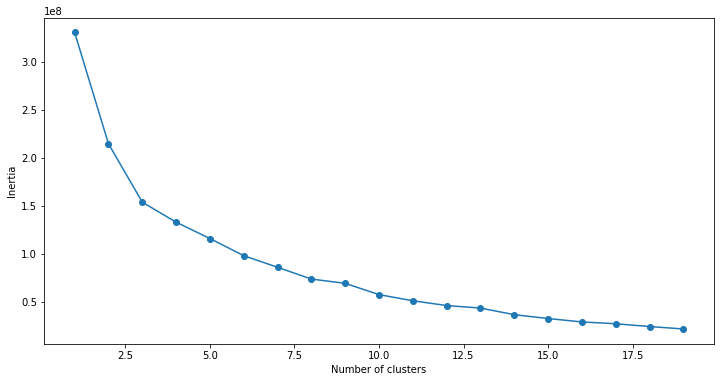

In [18]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [29]:
SSE_scaled = []
for cluster in range(1,30):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

In [30]:
SSE_scaled

[85942.99999999999,
 57483.27127833241,
 49731.354980565186,
 42701.83817524854,
 35420.45541794066,
 29819.093652979256,
 25760.39075281164,
 22661.033854434496,
 19669.537206573932,
 17058.699286459974,
 14798.297417104726,
 12801.243230583334,
 10929.550846848457,
 9523.53093491662,
 8563.133590622678,
 7591.908338184572,
 6814.088835336439,
 6268.271577583227,
 5588.76100498538,
 4982.189060322336,
 4310.342881144544,
 3779.3148852691397,
 3418.053151332481,
 2913.922088638091,
 2673.226666528524,
 2439.671440839281,
 2162.174253793211,
 1964.340449692013,
 1827.33855036676]

Text(0, 0.5, 'SSE')

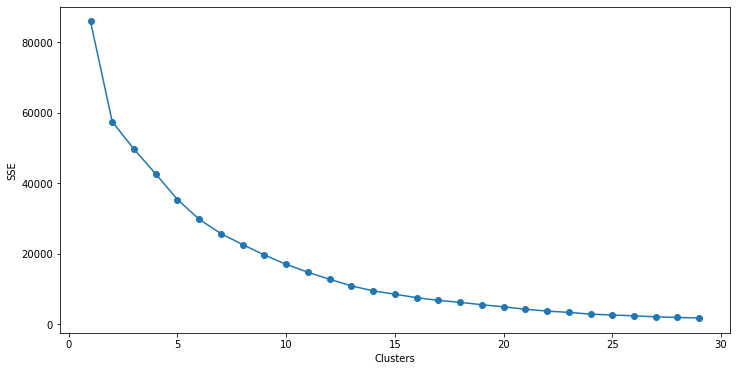

In [31]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [36]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [37]:
pd.Series(pred).value_counts()

0    7672
5      51
7      23
8      13
6      12
3      11
9      11
1      11
4       8
2       1
dtype: int64